<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/German_credit_card_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Noob919/Feature_selection/main/Data/Credit.csv")

In [ ]:
df_new =  df.drop(['Unnamed: 0'], axis =1)
len(df_new.columns)

17

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   sex              1000 non-null   object
 10  residence        1000 non-null   int64 
 11  age              1000 non-null   int64 
 12  housing          1000 non-null   object
 13  cards            1000 non-null   int64 
 14  liable           1000 non-null   int64 
 15  tele             1000 non-null   object
 16  foreign          1000 non-null   object
dtypes: int64(8), object(9)
memory usag

In [ ]:
for i in range(len(df_new.columns)):
  if(df_new[df_new.columns[i]].dtype == 'object'):
    df_new[df_new.columns[i]] = LabelEncoder().fit_transform(df_new[df_new.columns[i]])

In [ ]:
df_new.head(1)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
0,0,0,6,2,2,1169,0,2,4,1,4,67,1,2,1,1,0


In [ ]:
X  =  df_new.drop(['liable'],axis =1)
y  =  df_new['liable']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[6.363e-03 2.005e-01 3.948e+00 4.353e-02 1.989e+00 7.150e+02 7.554e-02
 9.469e-01 2.132e+00 1.283e+01 7.779e-01 5.081e+01 3.452e+00 2.849e+00
 1.297e-01 5.720e+00]


Text(0, 0.5, 'Features name')

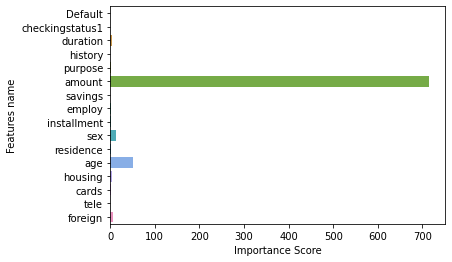

In [ ]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [ ]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]], 'score': np.sort(score)[::-1]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi

,Chi2 ranking,score
0,amount,715.026729
1,age,50.810611
2,sex,12.829116
3,foreign,5.720139
4,duration,3.948001
5,housing,3.451953
6,cards,2.849425
7,installment,2.132328
8,purpose,1.988536
9,employ,0.946940


In [ ]:
ranking_chi.to_excel("credit_card_dataset.xlsx",sheet_name='Chi_2')  

In [ ]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
rf.feature_importances_

array([0.03 , 0.052, 0.13 , 0.044, 0.06 , 0.166, 0.033, 0.047, 0.051,
       0.034, 0.055, 0.184, 0.039, 0.041, 0.028, 0.008])

Text(0.5, 0, 'Feature Importance')

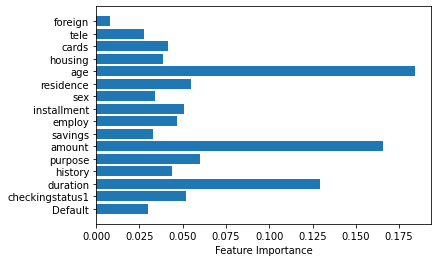

In [ ]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [ ]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]],'score': np.sort(rf.feature_importances_)[::-1] }
rank_tree = pd.DataFrame(data =  dc) 
rank_tree

,Tree based method Attributes,score
0,age,0.184199
1,amount,0.165671
2,duration,0.129545
3,purpose,0.060000
4,residence,0.054731
5,checkingstatus1,0.051955
6,installment,0.050932
7,employ,0.046861
8,history,0.043812
9,cards,0.041332


In [ ]:
from openpyxl import load_workbook
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

Text(0.5, 0, 'Feature Importance MEAN')

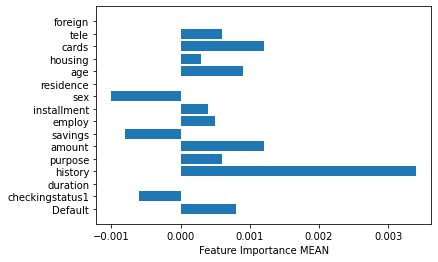

In [ ]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [19]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]],'score': np.sort(result.importances_mean)[::-1]}
rank_per_mean = pd.DataFrame(data =  dc) 
rank_per_mean

,Permutation_importance_mean,score
0,history,0.0034
1,cards,0.0012
2,amount,0.0012
3,age,0.0009
4,Default,0.0008
5,tele,0.0006
6,purpose,0.0006
7,employ,0.0005
8,installment,0.0004
9,housing,0.0003


In [20]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_mean.to_excel(writer, "permutation_method_mean")
writer.save()

Text(0.5, 0, 'Feature Importance STD')

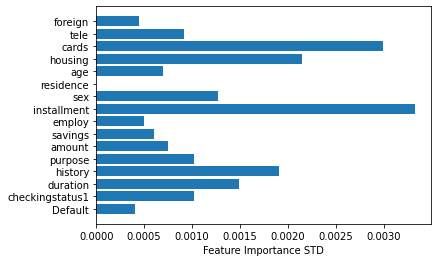

In [21]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [22]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]],'score': np.sort(result.importances_std)[::-1]}
rank_per_std = pd.DataFrame(data =  dc) 
rank_per_std

,Permutation_importance_std,score
0,installment,0.003323
1,cards,0.002993
2,housing,0.002147
3,history,0.001908
4,duration,0.001483
5,sex,0.001265
6,purpose,0.001020
7,checkingstatus1,0.001020
8,tele,0.000917
9,amount,0.000748


In [23]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

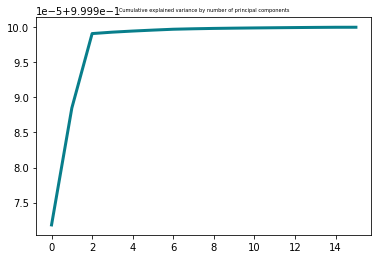

In [24]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [25]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Default,0.066967,-0.051210,0.061202,0.188673,0.023010,-0.014054,0.020857,0.050805,-0.031235,-0.035339,0.065188,0.184782,0.085397,0.109597,-0.319825,0.004837
checkingstatus1,-0.040815,0.077821,-0.056561,-1.237706,-0.082926,-0.113632,-0.024069,0.068126,-0.061693,-0.043624,0.024824,0.047679,0.014967,0.012373,-0.030638,0.002131
duration,7.688501,-1.873920,9.103231,-0.014788,0.001171,0.033315,-0.023138,-0.002239,0.001566,-0.000289,0.001758,-0.002224,0.000264,-0.000997,0.001146,0.000313
history,-0.042049,0.085260,-0.024572,-0.144729,-0.108432,0.014243,0.032116,-0.204552,0.393125,0.015577,0.006165,-0.204610,-0.201757,0.032258,-0.140776,-0.002325
purpose,0.021121,0.055515,-0.106582,-0.031852,-0.702933,0.702421,0.375264,0.039048,-0.016654,0.005318,0.009656,0.019042,0.030727,-0.005555,0.006545,-0.001227


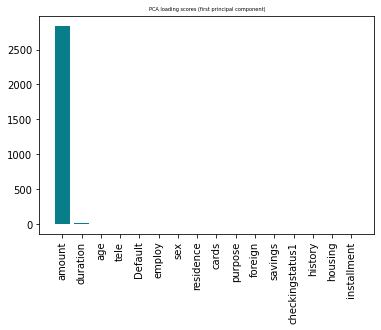

In [26]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
rank_pca

,PC1
amount,2834.054948
duration,7.688501
age,0.417931
tele,0.135345
Default,0.066967
employ,0.047863
sex,0.043759
residence,0.030536
cards,0.024231
purpose,0.021121


In [28]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

In [29]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 9, 12, 13, 11,  4,  7, 15,  8, 10,  5,  0,  3,  1,  2,  6, 14])

In [30]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['installment' 'age' 'housing' 'residence' 'history' 'savings' 'liable'
 'employ' 'sex' 'purpose' 'Unnamed: 0' 'duration' 'Default'
 'checkingstatus1' 'amount' 'cards']
[3.673e+01 1.663e+01 1.257e+01 1.176e+01 2.762e+00 2.355e+00 1.903e+00
 1.656e+00 1.365e+00 4.599e-01 2.434e-01 2.200e-01 1.179e-01 1.755e-02
 1.561e-02 3.369e-03]


Text(0, 0.5, 'Features')

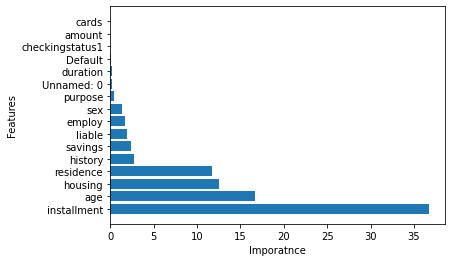

In [31]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [32]:
dc = {'Score': feature_importances_fscore , 'Name': best_features_fscore }
rank_f_test = pd.DataFrame(dc) 

In [33]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [34]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['residence', 'checkingstatus1', 'age', 'installment', 'employ',
       'sex', 'duration', 'history', 'purpose', 'cards', 'liable',
       'housing', 'savings', 'amount', 'Default', 'Unnamed: 0'],
      dtype=object)

In [35]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.042, 0.02 , 0.016, 0.016, 0.009, 0.007, 0.005, 0.003, 0.002,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Text(0, 0.5, 'Features')

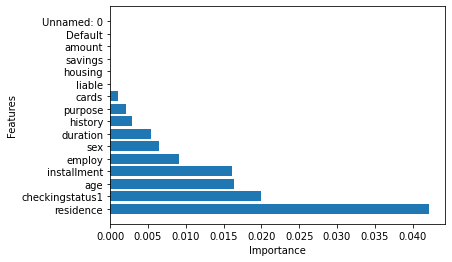

In [36]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [37]:
dc = {'Score':feature_importances_mutual_info, 'Name':best_features_mutual_info }
rank_mutual = pd.DataFrame(dc)

In [38]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [39]:
df_corr = df_new.corr()
df_corr

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,sex,residence,age,housing,cards,liable,tele,foreign
Default,1.000000,-0.350847,0.214927,-0.240127,-0.055605,0.154739,-0.087625,-0.059064,0.072404,-0.075493,0.002967,-0.091127,0.019315,-0.045732,-0.003015,-0.036466,-0.082079
checkingstatus1,-0.350847,1.000000,-0.072013,0.187207,0.008251,-0.042705,0.132846,0.028758,-0.005280,0.025578,-0.042234,0.059751,-0.022424,0.076005,-0.014145,0.066296,-0.026758
duration,0.214927,-0.072013,1.000000,-0.111096,-0.068548,0.624984,-0.027391,0.033412,0.074749,0.081432,0.034067,-0.036136,-0.157049,-0.011284,-0.023834,0.164718,-0.138196
history,-0.240127,0.187207,-0.111096,1.000000,0.119740,-0.084244,-0.004614,0.121225,0.039101,0.049068,0.058451,0.129890,-0.040297,0.388815,-0.012409,0.040463,0.031345
purpose,-0.055605,0.008251,-0.068548,0.119740,1.000000,0.039029,-0.006526,0.048399,-0.064892,0.001086,0.079226,0.038158,-0.027781,-0.036654,0.062125,-0.011297,0.075119
amount,0.154739,-0.042705,0.624984,-0.084244,0.039029,1.000000,-0.065513,0.071518,-0.271316,0.093482,0.028926,0.032716,-0.135632,0.020795,0.017142,0.276995,-0.050050
savings,-0.087625,0.132846,-0.027391,-0.004614,-0.006526,-0.065513,1.000000,0.000679,0.008436,-0.019213,0.022935,-0.003115,0.046906,-0.005261,-0.008270,-0.007001,0.012862
employ,-0.059064,0.028758,0.033412,0.121225,0.048399,0.071518,0.000679,1.000000,0.059148,0.153929,0.265638,0.365286,-0.209949,0.121156,0.042525,0.131305,-0.077264
installment,0.072404,-0.005280,0.074749,0.039101,-0.064892,-0.271316,0.008436,0.059148,1.000000,0.086302,0.049302,0.058266,-0.089405,0.021669,-0.071207,0.014413,-0.090024
sex,-0.075493,0.025578,0.081432,0.049068,0.001086,0.093482,-0.019213,0.153929,0.086302,1.000000,-0.013818,0.161694,-0.219844,0.094260,0.203431,0.075966,0.051202


In [40]:
corr_rank = pd.DataFrame(df_corr['liable'])
corr_rank = corr_rank.sort_values(by = 'liable',ascending = False)
corr_rank

,liable
liable,1.000000
sex,0.203431
age,0.118201
cards,0.109667
foreign,0.077071
purpose,0.062125
residence,0.042643
employ,0.042525
amount,0.017142
Default,-0.003015


In [41]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [ ]:
estimator = DecisionTreeClassifier()

In [ ]:
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [ ]:
index = selector.ranking_.argsort()
index

array([ 5, 11,  2, 10,  7,  3,  9, 13,  4,  8, 12,  6, 14,  1,  0, 15])

In [ ]:
X.columns

Index(['Default', 'checkingstatus1', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'sex', 'residence', 'age',
       'housing', 'cards', 'tele', 'foreign'],
      dtype='object')

In [ ]:
X.columns[index]

Index(['amount', 'age', 'duration', 'residence', 'employ', 'history', 'sex',
       'cards', 'purpose', 'installment', 'housing', 'savings', 'tele',
       'checkingstatus1', 'Default', 'foreign'],
      dtype='object')

In [ ]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
rank_RFE

,Rank_RFE
0,amount
1,age
2,duration
3,residence
4,employ
5,history
6,sex
7,cards
8,purpose
9,installment


In [ ]:
book = load_workbook('/content/credit_card_dataset.xlsx')
writer = pd.ExcelWriter('/content/credit_card_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()